## Import Modules

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, precision_score, recall_score, f1_score

## Loading and Cleaning Data

In [2]:
df = pd.read_csv("mushroom.data")
df

p  x  s  n  t p.1  f  c n.1  k  ... s.2  w w.1 p.2 w.2  o p.3 k.1 s.3  u
0     e  x  s  y  t   a  f  c   b  k  ...   s  w   w   p   w  o   p   n   n  g
1     e  b  s  w  t   l  f  c   b  n  ...   s  w   w   p   w  o   p   n   n  m
2     p  x  y  w  t   p  f  c   n  n  ...   s  w   w   p   w  o   p   k   s  u
3     e  x  s  g  f   n  f  w   b  k  ...   s  w   w   p   w  o   e   n   a  g
4     e  x  y  y  t   a  f  c   b  n  ...   s  w   w   p   w  o   p   k   n  g
...  .. .. .. .. ..  .. .. ..  .. ..  ...  .. ..  ..  ..  .. ..  ..  ..  .. ..
8118  e  k  s  n  f   n  a  c   b  y  ...   s  o   o   p   o  o   p   b   c  l
8119  e  x  s  n  f   n  a  c   b  y  ...   s  o   o   p   n  o   p   b   v  l
8120  e  f  s  n  f   n  a  c   b  n  ...   s  o   o   p   o  o   p   b   c  l
8121  p  k  y  n  f   y  f  c   n  b  ...   k  w   w   p   w  o   e   w   v  l
8122  e  x  s  n  f   n  a  c   b  y  ...   s  o   o   p   o  o   p   o   c  l

[8123 rows x 23 columns]

In [3]:
df = pd.read_csv("mushroom.data", names=['target','cap-shape','cap-surface','cap-color','bruises?',
                                         'odor','gill-attachment','gill-spacing','gill-size',
                                         'gill-color','stalk-shape','stalk-root','stalk-surface-above-ring',
                                         'stalk-surface-below-ring','stalk-color-above-ring','stalk-color-below-ring',
                                         'veil-type','veil-color','ring-number','ring-type','spore-print-color','population',
                                         'habitat'])
df

target cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0         p         x           s         n        t    p               f   
1         e         x           s         y        t    a               f   
2         e         b           s         w        t    l               f   
3         p         x           y         w        t    p               f   
4         e         x           s         g        f    n               f   
...     ...       ...         ...       ...      ...  ...             ...   
8119      e         k           s         n        f    n               a   
8120      e         x           s         n        f    n               a   
8121      e         f           s         n        f    n               a   
8122      p         k           y         n        f    y               f   
8123      e         x           s         n        f    n               a   

     gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0               c         n          k  ...                        s   
1               c         b          k  ...                        s   
2               c         b          n  ...                        s   
3               c         n          n  ...                        s   
4               w         b          k  ...                        s   
...           ...       ...        ...  ...                      ...   
8119            c         b          y  ...                        s   
8120            c         b          y  ...                        s   
8121            c         b          n  ...                        s   
8122            c         n          b  ...                        k   
8123            c         b          y  ...                        s   

     stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                         w                      w         p          w   
1                         w                      w         p          w   
2                         w                      w         p          w   
3                         w                      w         p          w   
4                         w                      w         p          w   
...                     ...                    ...       ...        ...   
8119                      o                      o         p          o   
8120                      o                      o         p          n   
8121                      o                      o         p          o   
8122                      w                      w         p          w   
8123                      o                      o         p          o   

     ring-number ring-type spore-print-color population habitat  
0              o         p                 k          s       u  
1              o         p                 n          n       g  
2              o         p                 n          n       m  
3              o         p                 k          s       u  
4              o         e                 n          a       g  
...          ...       ...               ...        ...     ...  
8119           o         p                 b          c       l  
8120           o         p                 b          v       l  
8121           o         p                 b          c       l  
8122           o         e                 w          v       l  
8123           o         p                 o          c       l  

[8124 rows x 23 columns]

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   target                    8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises?                  8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
df.describe()

target cap-shape cap-surface cap-color bruises?  odor gill-attachment  \
count    8124      8124        8124      8124     8124  8124            8124   
unique      2         6           4        10        2     9               2   
top         e         x           y         n        f     n               f   
freq     4208      3656        3244      2284     4748  3528            7914   

       gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
count          8124      8124       8124  ...                     8124   
unique            2         2         12  ...                        4   
top               c         b          b  ...                        s   
freq           6812      5612       1728  ...                     4936   

       stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
count                    8124                   8124      8124       8124   
unique                      9                      9         1          4   
top                         w                      w         p          w   
freq                     4464                   4384      8124       7924   

       ring-number ring-type spore-print-color population habitat  
count         8124      8124              8124       8124    8124  
unique           3         5                 9          6       7  
top              o         p                 w          v       d  
freq          7488      3968              2388       4040    3148  

[4 rows x 23 columns]

In [6]:
df.isnull().sum()

target                      0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [7]:
df.dtypes

target                      object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises?                    object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [8]:
df.shape

(8124, 23)

In [9]:
df.replace('?', np.nan, inplace = True)

In [10]:
df.head()

target cap-shape cap-surface cap-color bruises? odor gill-attachment  \
0      p         x           s         n        t    p               f   
1      e         x           s         y        t    a               f   
2      e         b           s         w        t    l               f   
3      p         x           y         w        t    p               f   
4      e         x           s         g        f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 23 columns]

In [11]:
df.isnull().sum()

target                         0
cap-shape                      0
cap-surface                    0
cap-color                      0
bruises?                       0
odor                           0
gill-attachment                0
gill-spacing                   0
gill-size                      0
gill-color                     0
stalk-shape                    0
stalk-root                  2480
stalk-surface-above-ring       0
stalk-surface-below-ring       0
stalk-color-above-ring         0
stalk-color-below-ring         0
veil-type                      0
veil-color                     0
ring-number                    0
ring-type                      0
spore-print-color              0
population                     0
habitat                        0
dtype: int64

In [12]:
df.dropna(subset=['stalk-root'], inplace = True)

In [13]:
df.isnull().sum()

target                      0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Handling Categorical Data

In [14]:
imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
imputer = imputer.fit(df[['stalk-root']])
df[['stalk-root']] = imputer.transform(df[['stalk-root']])

In [15]:
df.isnull().sum()

target                      0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises?                    0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

## Visualization

In [16]:
targetdf = df['target']
targetdf

0       p
1       e
2       e
3       p
4       e
       ..
7986    e
8001    e
8038    e
8095    p
8114    p
Name: target, Length: 5644, dtype: object

In [17]:
df['target'].value_counts()

e    3488
p    2156
Name: target, dtype: int64

In [18]:
df["target"].unique()

array(['p', 'e'], dtype=object)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


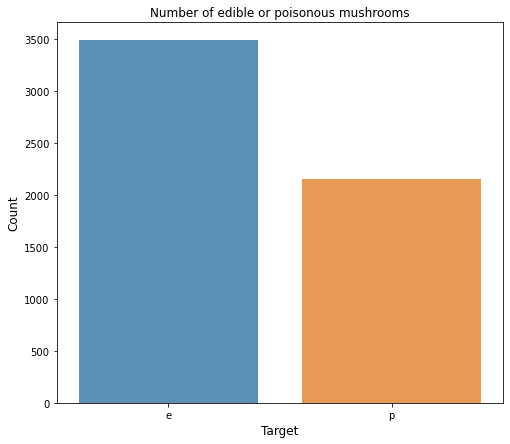

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
count = df['target'].value_counts()
plt.figure(figsize=(8,7))
sns.barplot(count.index, count.values, alpha=0.8)
plt.ylabel('Count', fontsize=12)
plt.xlabel('Target', fontsize=12)
plt.title('Number of edible or poisonous mushrooms')
plt.show()

## ....

In [20]:
X = df.loc[:, df.columns !='target']
X.head()

cap-shape cap-surface cap-color bruises? odor gill-attachment gill-spacing  \
0         x           s         n        t    p               f            c   
1         x           s         y        t    a               f            c   
2         b           s         w        t    l               f            c   
3         x           y         w        t    p               f            c   
4         x           s         g        f    n               f            w   

  gill-size gill-color stalk-shape  ... stalk-surface-below-ring  \
0         n          k           e  ...                        s   
1         b          k           e  ...                        s   
2         b          n           e  ...                        s   
3         n          n           e  ...                        s   
4         b          k           t  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w                      w         p          w   
1                      w                      w         p          w   
2                      w                      w         p          w   
3                      w                      w         p          w   
4                      w                      w         p          w   

  ring-number ring-type spore-print-color population habitat  
0           o         p                 k          s       u  
1           o         p                 n          n       g  
2           o         p                 n          n       m  
3           o         p                 k          s       u  
4           o         e                 n          a       g  

[5 rows x 22 columns]

## Encoding Techniques

In [21]:
enc_1 = pd.get_dummies(X)
enc_1.head()

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0            0            0            0            0            0   
1            0            0            0            0            0   
2            1            0            0            0            0   
3            0            0            0            0            0   
4            0            0            0            0            0   

   cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0            1              0              0              1              0   
1            1              0              0              1              0   
2            0              0              0              1              0   
3            1              0              0              0              1   
4            1              0              0              1              0   

   ...  population_n  population_s  population_v  population_y  habitat_d  \
0  ...             0             1             0             0          0   
1  ...             1             0             0             0          0   
2  ...             1             0             0             0          0   
3  ...             0             1             0             0          0   
4  ...             0             0             0             0          0   

   habitat_g  habitat_l  habitat_m  habitat_p  habitat_u  
0          0          0          0          0          1  
1          1          0          0          0          0  
2          0          0          1          0          0  
3          0          0          0          0          1  
4          1          0          0          0          0  

[5 rows x 98 columns]

In [25]:
categorical_columns=['cap-shape','cap-surface','cap-color','bruises?','odor',
                     'gill-attachment','gill-spacing','gill-size','gill-color',
                     'stalk-shape','stalk-root','stalk-surface-above-ring',
                     'stalk-surface-below-ring','stalk-color-above-ring',
                     'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
cdf = df[categorical_columns]
dummies_df = pd.get_dummies(cdf)
dummies_df.head(15)

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0             0            0            0            0            0   
1             0            0            0            0            0   
2             1            0            0            0            0   
3             0            0            0            0            0   
4             0            0            0            0            0   
5             0            0            0            0            0   
6             1            0            0            0            0   
7             1            0            0            0            0   
8             0            0            0            0            0   
9             1            0            0            0            0   
10            0            0            0            0            0   
11            0            0            0            0            0   
12            1            0            0            0            0   
13            0            0            0            0            0   
14            0            0            0            0            0   

    cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0             1              0              0              1              0   
1             1              0              0              1              0   
2             0              0              0              1              0   
3             1              0              0              0              1   
4             1              0              0              1              0   
5             1              0              0              0              1   
6             0              0              0              1              0   
7             0              0              0              0              1   
8             1              0              0              0              1   
9             0              0              0              1              0   
10            1              0              0              0              1   
11            1              0              0              0              1   
12            0              0              0              1              0   
13            1              0              0              0              1   
14            1              1              0              0              0   

    ...  population_n  population_s  population_v  population_y  habitat_d  \
0   ...             0             1             0             0          0   
1   ...             1             0             0             0          0   
2   ...             1             0             0             0          0   
3   ...             0             1             0             0          0   
4   ...             0             0             0             0          0   
5   ...             1             0             0             0          0   
6   ...             1             0             0             0          0   
7   ...             0             1             0             0          0   
8   ...             0             0             1             0          0   
9   ...             0             1             0             0          0   
10  ...             1             0             0             0          0   
11  ...             0             1             0             0          0   
12  ...             0             1             0             0          0   
13  ...             0             0             1             0          0   
14  ...             0             0             0             0          0   

    habitat_g  habitat_l  habitat_m  habitat_p  habitat_u  
0           0          0          0          0          1  
1           1          0          0          0          0  
2           0          0          1          0          0  
3           0          0          0          0          1  
4           1          0          0          0       

## Ordinal Encoding

In [26]:
from pandas.core.arrays import categorical
from sklearn.preprocessing import OrdinalEncoder
o =  OrdinalEncoder()
target=['target']
new_df=pd.DataFrame(target,columns=['target'])
enc = o.fit_transform(df.drop(columns='target',axis=1))
enc

array([[5., 2., 4., ..., 1., 3., 5.],
       [5., 2., 7., ..., 2., 2., 1.],
       [0., 2., 6., ..., 2., 2., 3.],
       ...,
       [5., 3., 3., ..., 5., 5., 4.],
       [5., 3., 1., ..., 5., 1., 0.],
       [2., 3., 1., ..., 5., 1., 0.]])

In [27]:
c_columns=['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring','veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']
newdf = pd.DataFrame(enc,columns=c_columns)
newdf.head()

cap-shape  cap-surface  cap-color  bruises  odor  gill-attachment  \
0        5.0          2.0        4.0      1.0   6.0              1.0   
1        5.0          2.0        7.0      1.0   0.0              1.0   
2        0.0          2.0        6.0      1.0   3.0              1.0   
3        5.0          3.0        6.0      1.0   6.0              1.0   
4        5.0          2.0        3.0      0.0   5.0              1.0   

   gill-spacing  gill-size  gill-color  stalk-shape  ...  \
0           0.0        1.0         2.0          0.0  ...   
1           0.0        0.0         2.0          0.0  ...   
2           0.0        0.0         3.0          0.0  ...   
3           0.0        1.0         3.0          0.0  ...   
4           1.0        0.0         2.0          1.0  ...   

   stalk-surface-below-ring  stalk-color-above-ring  stalk-color-below-ring  \
0                       2.0                     5.0                     5.0   
1                       2.0                     5.0                     5.0   
2                       2.0                     5.0                     5.0   
3                       2.0                     5.0                     5.0   
4                       2.0                     5.0                     5.0   

   veil-type  veil-color  ring-number  ring-type  spore-print-color  \
0        0.0         0.0          1.0        3.0                1.0   
1        0.0         0.0          1.0        3.0                2.0   
2        0.0         0.0          1.0        3.0                2.0   
3        0.0         0.0          1.0        3.0                1.0   
4        0.0         0.0          1.0        0.0                2.0   

   population  habitat  
0         3.0      5.0  
1         2.0      1.0  
2         2.0      3.0  
3         3.0      5.0  
4         0.0      1.0  

[5 rows x 22 columns]

## Label Encoder

In [29]:
categ = ['cap-shape', 'cap-surface', 'cap-color', 'bruises?', 'odor', 'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-type','veil-color','ring-number','ring-type','spore-print-color','population','habitat']

# Encode Categorical Columns
le = LabelEncoder()
df[categ] = df[categ].apply(le.fit_transform)
df

target  cap-shape  cap-surface  cap-color  bruises?  odor  \
0         p          5            2          4         1     6   
1         e          5            2          7         1     0   
2         e          0            2          6         1     3   
3         p          5            3          6         1     6   
4         e          5            2          3         0     5   
...     ...        ...          ...        ...       ...   ...   
7986      e          0            3          4         0     5   
8001      e          5            3          4         0     5   
8038      e          5            3          3         1     5   
8095      p          5            3          1         0     4   
8114      p          2            3          1         0     4   

      gill-attachment  gill-spacing  gill-size  gill-color  ...  \
0                   1             0          1           2  ...   
1                   1             0          0           2  ...   
2                   1             0          0           3  ...   
3                   1             0          1           3  ...   
4                   1             1          0           2  ...   
...               ...           ...        ...         ...  ...   
7986                1             0          0           7  ...   
8001                1             0          0           7  ...   
8038                1             0          0           7  ...   
8095                1             0          0           8  ...   
8114                0             0          0           8  ...   

      stalk-surface-below-ring  stalk-color-above-ring  \
0                            2                       5   
1                            2                       5   
2                            2                       5   
3                            2                       5   
4                            2                       5   
...                        ...                     ...   
7986                         3                       3   
8001                         3                       3   
8038                         2                       5   
8095                         3                       1   
8114                         3                       1   

      stalk-color-below-ring  veil-type  veil-color  ring-number  ring-type  \
0                          5          0           0            1          3   
1                          5          0           0            1          3   
2                          5          0           0            1          3   
3                          5          0           0            1          3   
4                          5          0           0            1          0   
...                      ...        ...         ...          ...        ...   
7986                       3          0           0            2          3   
8001                       3          0           0            2          3   
8038                       5          0           0            2          3   
8095                       1          0           0            0          2   
8114                       1          0           0            0          2   

      spore-print-color  population  habitat  
0                     1           3        5  
1                     2           2        1  
2                     2           2        3  
3                     1           3        5  
4                     2           0        1  
...                 ...         ...      ...  
7986                  5           5        4  
8001                  5           5        4  
8038                  5           5        4  
8095                  5           1        0  
8114                  5           1        0  

[5644 rows x 23 columns]

In [30]:
finaldf=pd.concat([dummies_df,targetdf], axis=1)
finaldf

cap-shape_b  cap-shape_c  cap-shape_f  cap-shape_k  cap-shape_s  \
0               0            0            0            0            0   
1               0            0            0            0            0   
2               1            0            0            0            0   
3               0            0            0            0            0   
4               0            0            0            0            0   
...           ...          ...          ...          ...          ...   
7986            1            0            0            0            0   
8001            0            0            0            0            0   
8038            0            0            0            0            0   
8095            0            0            0            0            0   
8114            0            0            1            0            0   

      cap-shape_x  cap-surface_f  cap-surface_g  cap-surface_s  cap-surface_y  \
0               1              0              0              1              0   
1               1              0              0              1              0   
2               0              0              0              1              0   
3               1              0              0              0              1   
4               1              0              0              1              0   
...           ...            ...            ...            ...            ...   
7986            0              0              0              0              1   
8001            1              0              0              0              1   
8038            1              0              0              0              1   
8095            1              0              0              0              1   
8114            0              0              0              0              1   

      ...  population_s  population_v  population_y  habitat_d  habitat_g  \
0     ...             1             0             0          0          0   
1     ...             0             0             0          0          1   
2     ...             0             0             0          0          0   
3     ...             1             0             0          0          0   
4     ...             0             0             0          0          1   
...   ...           ...           ...           ...        ...        ...   
7986  ...             0             0             1          0          0   
8001  ...             0             0             1          0          0   
8038  ...             0             0             1          0          0   
8095  ...             0             0             0          1          0   
8114  ...             0             0             0          1          0   

      habitat_l  habitat_m  habitat_p  habitat_u  target  
0             0          0          0          1       p  
1             0          0          0          0       e  
2             0          1          0          0       e  
3             0          0          0          1       p  
4             0          0          0          0       e  
...         ...        ...        ...        ...     ...  
7986          0          0          1          0       e  
8001          0          0          1          0       e  
8038          0          0          1          0       e  
8095          0          0          0          0       p  
8114          0          0          0          0       p  

[5644 rows x 99 columns]

## Train-Test Split

In [31]:
X=finaldf.iloc[:,:-1];
y=finaldf.iloc[:,-1];
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Model Training

In [32]:
model=LogisticRegression()

In [33]:
model.fit(X_train,y_train)

LogisticRegression()

## Model Evaluation

In [34]:
model.score(X_train,y_train)

1.0

In [35]:
model.score(X_test,y_test)

1.0

In [36]:
y_hat = model.predict(X_test)
y_hat

array(['p', 'e', 'e', ..., 'e', 'p', 'p'], dtype=object)

In [37]:
matrix = confusion_matrix(y_test,y_hat)
matrix

array([[709,   0],
       [  0, 420]], dtype=int64)

Text(33.0, 0.5, 'Truth')

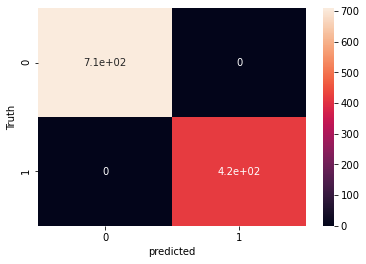

In [38]:
sns.heatmap(data=matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [39]:
precision_score(y_test, y_hat, average='micro')

1.0

In [40]:
recall_score(y_test, y_hat, average='micro')

1.0

In [41]:
f1_score(y_test, y_hat, average='micro')

1.0

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
knn

KNeighborsClassifier()

In [43]:
knn.score(X_train,y_train)

1.0

In [44]:
 knn.score(X_test,y_test)

1.0

In [45]:
from sklearn.metrics import confusion_matrix
y_hat = knn.predict(X_test)
y_hat

array(['p', 'e', 'e', ..., 'e', 'p', 'p'], dtype=object)

In [46]:
knn.predict_proba(X_test), y_hat

(array([[0., 1.],
        [1., 0.],
        [1., 0.],
        ...,
        [1., 0.],
        [0., 1.],
        [0., 1.]]),
 array(['p', 'e', 'e', ..., 'e', 'p', 'p'], dtype=object))

In [47]:
matrix = confusion_matrix(y_test,y_hat)

Text(33.0, 0.5, 'Truth')

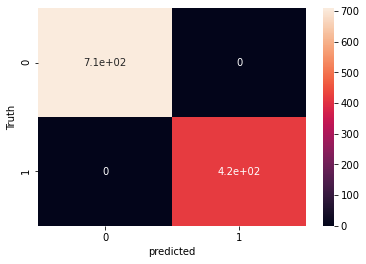

In [48]:
sns.heatmap(data=matrix,annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")

In [49]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_hat))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       709
           p       1.00      1.00      1.00       420

    accuracy                           1.00      1129
   macro avg       1.00      1.00      1.00      1129
weighted avg       1.00      1.00      1.00      1129



In [50]:
print(precision_score(y_test,y_hat,average='micro'))

1.0
